# Cartoon of spectral differential observations

In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
from astropy.modeling import models, fitting
from astropy.modeling.models import Gaussian1D

def mk_gaussian_sum(x, amplitudes, means, stddevs, noise=1/200):
    '''Create 3 spectral lines by adding 3 gaussians together'''
    assert len(amplitudes) == len(means), ' Not the same length inputs'
    assert len(amplitudes) == len(stddevs), ' Not the same length inputs'
    y = np.ones_like(x)
    for i in range(len(amplitudes)):
        g = Gaussian1D(amplitude=amplitudes[i], mean=means[i], stddev=stddevs[i])
        # print g(x)
        y -= g(x) # Adding each Gaussian  
    #y +=  np.random.normal(0, noise, x.shape)		# Adding some noise to our data

    return y


wavelength = np.linspace(2110, 2113, 150)
stellar_amp = [.4, .5]
stellar_amp2 = [.3, .4]
stellar_means = [2111.1, 2112.1]
stellar_stddevs = [.1, .06]
stellar_lines = mk_gaussian_sum(wavelength, stellar_amp, stellar_means, stellar_stddevs)
stellar_lines2 = mk_gaussian_sum(wavelength, stellar_amp2, stellar_means, stellar_stddevs)
#stellar_fit = mk_gaussian_sum(wavelength, stellar_amp, stellar_means, stellar_stddevs,  noise=1/100000000)


telluric_amp = [.05, .05, .075]
telluric_amp2 = [.1, .13, .2]
telluric_means = [2110.5, 2111.4, 2112.6]
telluric_stddevs = [0.05, .07, .05]
telluric_lines = mk_gaussian_sum(wavelength, telluric_amp, telluric_means, telluric_stddevs)
#telluric_fit = mk_gaussian_sum(wavelength, telluric_amp, telluric_means, telluric_stddevs, noise=1/100000000)
##print(telluric_lines)
##print(stellar_lines)

combined_lines = stellar_lines * telluric_lines


print(np.mean(wavelength))

2111.5


In [4]:
# Get different combinations of shifts
shifted_wl1 = wavelength + 0
shifted_telluric_lines1 = mk_gaussian_sum(wavelength, telluric_amp, telluric_means, telluric_stddevs)  
shift1 = stellar_lines * shifted_telluric_lines1

# Get different combinations of shifts
shifted_wl2 = wavelength + 0
shifted_telluric_lines2 = mk_gaussian_sum(shifted_wl2, telluric_amp2, telluric_means, telluric_stddevs) 
shift2 = stellar_lines2 * shifted_telluric_lines2

# Get different combinations of shifts
shifted_wl3 = wavelength + 0.2
shifted_telluric_lines3 = mk_gaussian_sum(shifted_wl3, telluric_amp2, telluric_means, telluric_stddevs)
shift3 = stellar_lines2 * shifted_telluric_lines3

# Get different combinations of shifts
shifted_wl4 = wavelength - 0.2
shifted_telluric_lines4 = mk_gaussian_sum(shifted_wl4, telluric_amp2, telluric_means, telluric_stddevs)
shift4 = stellar_lines2 * shifted_telluric_lines4

In [14]:
# xkcd plot
plt.xkcd()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.xticks([])
plt.yticks([])
ax.set_ylim([0.2, 1.1])


plt.plot(shifted_wl1, shift1)
plt.annotate('Star',
    xy=(2111.1, 0.6), arrowprops=dict(arrowstyle='->'), xytext=(2111.5, 0.3))
plt.annotate('Star',
    xy=(2112.1, 0.5), arrowprops=dict(arrowstyle='->'), xytext=(2111.5, 0.3))
plt.annotate('Planet',
    xy=(2110.5, 0.95), arrowprops=dict(arrowstyle='->'), xytext=(2111.5, 0.65))
plt.annotate('Planet',
    xy=(2111.4, 0.95), arrowprops=dict(arrowstyle='->'), xytext=(2111.5, 0.65))
plt.annotate('Planet',
    xy=(2112.6, 0.925), arrowprops=dict(arrowstyle='->'), xytext=(2111.5, 0.65))

plt.xlabel('Wavelength')
plt.ylabel('Normalized Flux')


plt.xkcd()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.xticks([])
plt.yticks([])
ax.set_ylim([0.2, 1.1])

plt.plot(shift1, label='Optical')
plt.plot(shift2, label='Infared')
plt.legend(loc=0)
plt.xlabel('Wavelength')
plt.ylabel('Normalized Flux')


# xkcd plot
plt.xkcd()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.xticks([])
plt.yticks([])
ax.set_ylim([0.2, 1.1])

plt.plot(shift2, 'r', label="Infared")
plt.plot(shift3, 'm-.', label="+15km/s")
plt.plot(shift4, 'k--', label="-15km/s")
plt.legend(loc=0)
plt.xlabel('Wavelength')
plt.ylabel('Normalized Flux')


plt.xkcd()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.xticks([])
plt.yticks([])
ax.set_ylim([-0.4, 0.4])

plt.plot(shift2-shift3, label="Difference")

plt.legend(loc=0)
plt.xlabel('Wavelength')
plt.ylabel('Differential Flux')

/home/jneal/anaconda2/envs/python3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


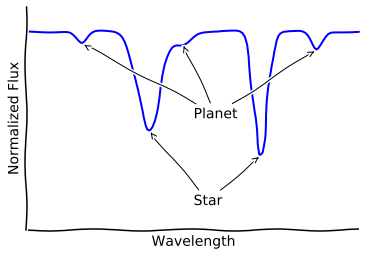

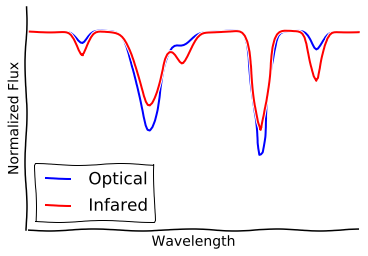

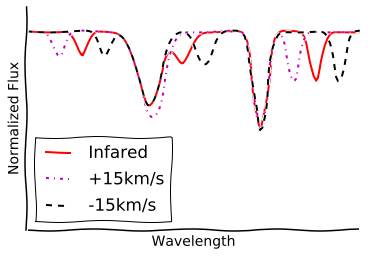

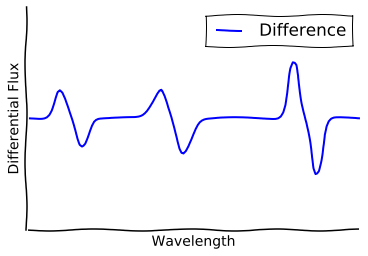

In [15]:
plt.show()